In [175]:
import numpy as np 
import matplotlib.pyplot as plt

In [176]:
%%html
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Toggle code cells"></form>


<h1><center>Defining nice functions for Gradient Ascent</center></h1>
<p><center>Initial function f(x):</center></p>
$$f(x) = -{x}^2 + 2$$
<p><center>Initial derivative function df(x):</center></p>
$$f'(x) = -2{x}$$

In [177]:
def f(x):
    return - x ** 2 + 2

def df(x):
    return - 2 * x

<h1><center>Plotting f(x) vs f'(x)</center></h1>

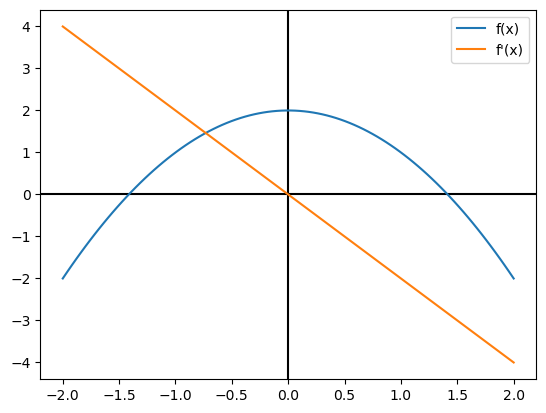

In [178]:
min_x = -2
max_x = 2
steps = 100

x = np.linspace(min_x, max_x, steps)
y = f(x)

plt.axvline(x=0, c='black')
plt.axhline(y=0, c='black')

plt.plot(x, y, label ='f(x)')
plt.plot(x, df(x), label='f\'(x)')
plt.legend()
plt.show()
    


<h1><center>Defining the fuction for gradient ascent</center></h1>
<p><center>Function being used for a single update is</center></p>
$$x_{t+1} = x_{t} + lr* f'(x)$$
<p><center>Below an example with a singular update hyperparams of:</center></p>
$$x_{initial} = -1$$
$$\textrm{learning rate}  = 0.2 $$


In [179]:
def one_step_gradient_ascent(x, learning_rate, dfunc):
    """
    Function to get a single step in gradient ascent
    
    Args:
        x (float): the x value to use in gradient ascent
        learning_rate (float): The value that multiplies the derivative
        dfunc (function): f'(x) the function to use to get the derivative, e.g. df from above
    """
    return x + learning_rate * dfunc(x)

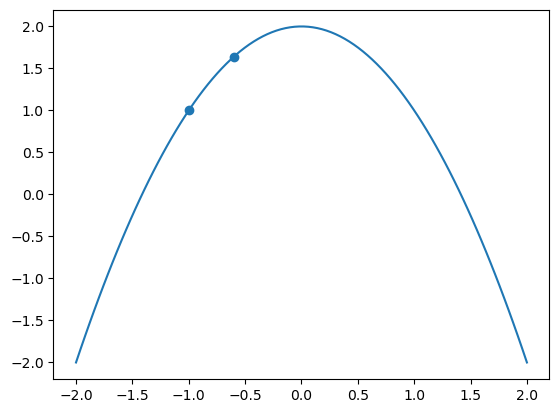

In [180]:
a = -1
b = one_step_gradient_ascent(a, learning_rate = 0.2, dfunc=df)

plt.scatter([a,b], [f(a),f(b)])
plt.plot(x, f(x))
plt.show()

In [181]:
def n_step_gradient_ascent(num_steps, x_val, learning_rate, func, dfunc, show_legend=True, plot_jumps=False):
    """
    Function to do gradient ascent to n steps
    Plots the ascent steps on the graph and colours based on where in the sequence the point is
    
    Args:
        num_steps (int): The number of steps to make 
        x_val (float): The initial x position 
        learning_rate (float): The value that multiplies the derivative
        func (function): f(x) the function to use when getting the y values
        dfunc (function): f'(x) the function to use to get the derivative, e.g. df from above
    """
    x_vals = [x_val]
    y_vals = [func(x_val)]
    
    for i in range(num_steps-1):
        x_val = one_step_gradient_ascent(x_val, learning_rate, dfunc)
        x_vals.append(x_val)
        y_vals.append(func(x_val))
    min_x, max_x = min(x_vals), max(x_vals)
    x = np.linspace(min_x - 0.2*(max_x-min_x), max_x + 0.2*(max_x-min_x),100)
    plt.plot(x,func(x), zorder=-1)
    plt.axvline(x=0, c='black', zorder=-1)
    plt.axhline(y=0, c='black', zorder=-1)
    if plot_jumps:
        plt.plot(x_vals, y_vals, '--')
    for i in range(len(x_vals)):
        # Colour value for points is RGB where start point is blue fading to red to the end point
        plt.scatter([x_vals[i]], y_vals[i], 
                     color=(((i + 1) / len(x_vals)), # num of point / num of points
                            0,
                            ((len(x_vals) - (i + 1)) / len(x_vals))), # num of points - num of point / num of points
                    label=f'Point {i+1}, x = {x_vals[i]:.2f}'
                    ) 
    if show_legend:
        plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.show()

<h1>An example of the "nice" gradient ascent function where it should always converge to 0 given a learning rate between 0 and 1</h1>
<p><center>Using hyperparams:</center></p>
$$x_{initial} = -4$$
$$\textrm{learning rate}  = 0.2 $$

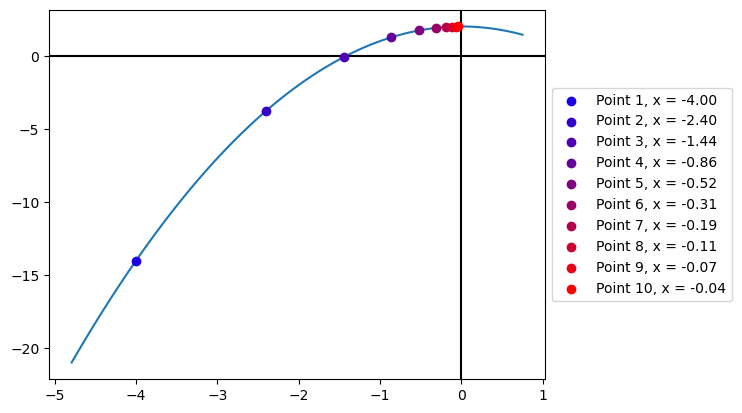

In [182]:
n_step_gradient_ascent(
    num_steps=10, 
    x_val=-4, 
    learning_rate=0.2, 
    func=f, 
    dfunc=df
)

<h1><center>Hyperparams to create gradient ascent where it jumps either side of origin</center></h1>
<p><center>Hyperparams:</center></p>
$$x_{initial} = -4$$
$$\textrm{learning rate}  = 0.9 $$

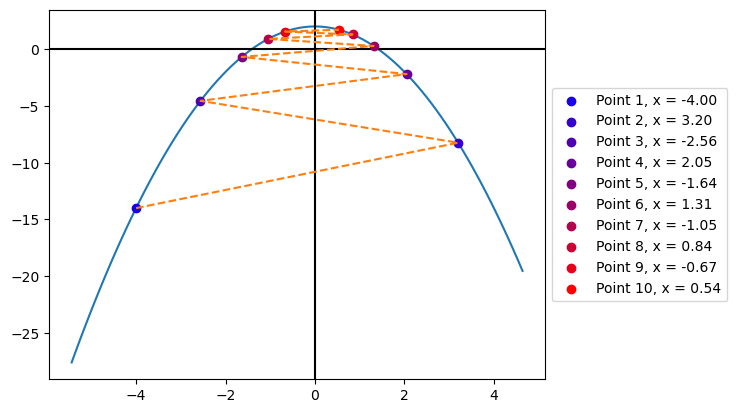

In [183]:
n_step_gradient_ascent(
    num_steps=10, 
    x_val=-4, 
    learning_rate=0.9, 
    func=f, 
    dfunc=df,
    plot_jumps=True
)

<h1><center>Creating a function where there is an inflection point</center></h1>
<p><center>In this case using the function:</center></p>
$$f(x) = {x}^3$$
<p><center>With the derivative function being:</center></p>
$$f'(x) = 3{x}^2$$
<p><center>Plotted below</center></p>

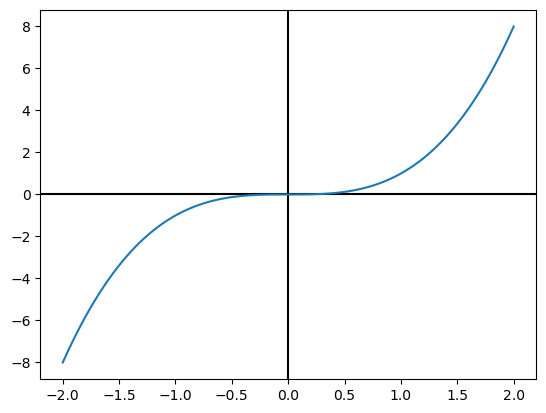

In [184]:
def g(x):
    return x ** 3

def dg(x):
    return 3 * x **2

gx = np.linspace(-2, 2, 100)
gy = g(gx)

plt.axvline(x=0, c='black', zorder=-1)
plt.axhline(y=0, c='black', zorder=-1)
plt.plot(gx, gy)
plt.show()

<h1><center>Performing gradient ascent</center></h1>
<p><center>Hyperparams used:</center></p>
$$x_{initial} = -2$$
$$\textrm{learning rate}  = 0.05 $$

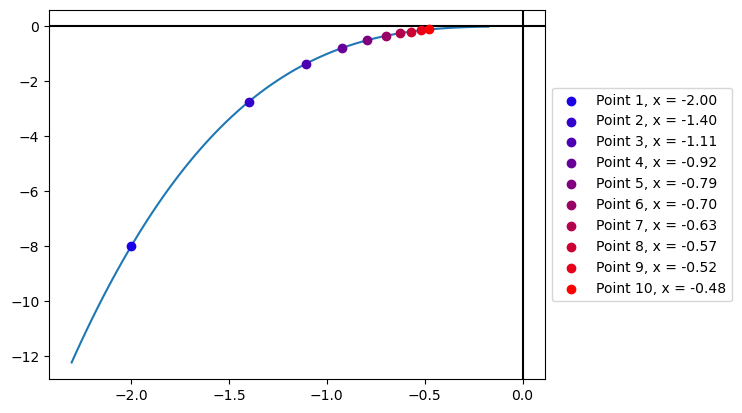

In [185]:
n_step_gradient_ascent(
    num_steps=10, 
    x_val=-2, 
    learning_rate=0.05,
    func=g,
    dfunc=dg
)

<h1><center>Showing exploding gradient example</center></h1>
$$\textrm{Using the funcion: }f(x)=x^3$$
$$\textrm{Taking an initial value }x_0\textrm{ as a small number, in this case 0.05}$$
$$\textrm{We see that as we are adding the learning rate multiplied by the derivate, and the derivative of }x^3\textrm{ is always positive}$$
$$\textrm{Gradient ascent will therefore always increase the x value}$$

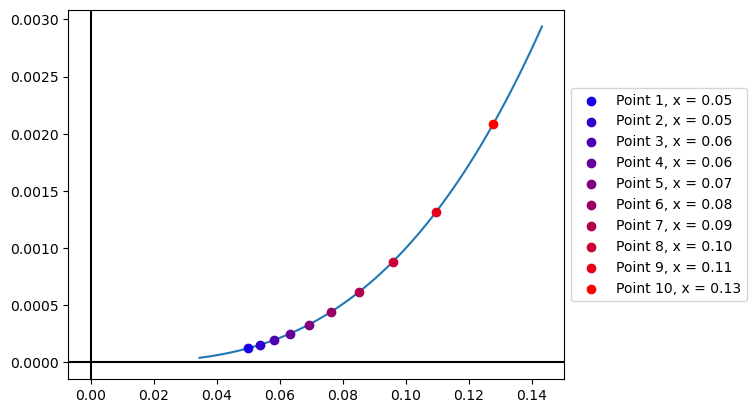

In [193]:
n_step_gradient_ascent(
    num_steps=10, 
    x_val=0.05, 
    learning_rate=0.5,
    func=g,
    dfunc=dg
)

<p>In this case we specify hyperparams which cause the second x point to go above 0, therefore creating a sequence that will constantly increase without convergence</p>
$$x_{initial} = -2$$
$$\textrm{learning rate}  = 0.18 $$

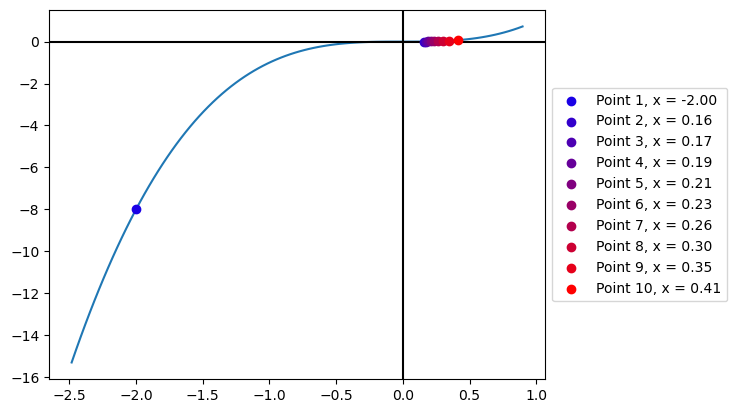

In [187]:
n_step_gradient_ascent(
    num_steps=10, 
    x_val=-2, 
    learning_rate=0.18,
    func=g,
    dfunc=dg
)